<a href="https://colab.research.google.com/github/endtheme123/ML_note/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with TensorFlow

in this notebook we're going to learn how to write neural network for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* binary classification
* Multiclass classificaion
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)



In [4]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
#check the label
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now, let's visualize it

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


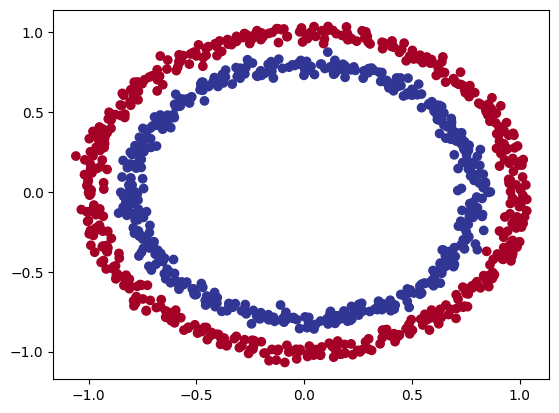

In [10]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

##imput and output shape of our neural network

In [12]:
#check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [13]:
#How many samples we're working with
len(X), len(y)

(1000, 1000)

In [14]:
#view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [18]:
#train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##Steps in modelling
the steps in modelling with tf are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...

In [22]:
#import tensorflow
import tensorflow as tf
tf.__version__


'2.12.0'

In [21]:
import tensorflow as tf

#set random seed
tf.random.set_seed(42)

#1. create the model using Sequential API
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1)
    
])

#2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])


#3. fit the model
model_1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 3.5486 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5390
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4810


In [23]:
#let's try and improve our model by training for longer...

model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around -50% accuracy, it's performing as if it's guessing

SO let's step things up and add an extra layer.

In [24]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_2.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)

In [25]:
#4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4610


[0.6933241486549377, 0.460999995470047]

##Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might want to fit our model for more epochs (basically training our model for long)

In [82]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model(this is time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #add 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#3. fit the model
model_3.fit(X_train,y_train, epochs = 100, verbose=0)

In [30]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4500


[0.7029988169670105, 0.44999998807907104]

To visualize our model prediction let's create our function `plot_decision_boundary()`, this function will:
* take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [31]:
import numpy as np


In [86]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


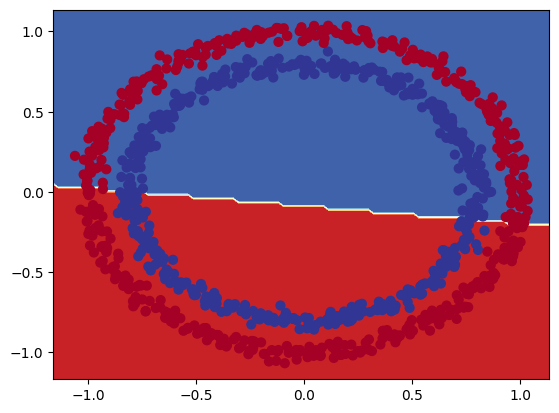

In [83]:
#check out the prediction our model is making
plot_decision_boundary(model = model_3, X = X, y=y)

In [39]:
#let's see if our model can be used for a regression problem

tf.random.set_seed(42)


X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y = X + 100


#Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit our model this these data
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train,epochs = 100)

Epoch 1/100


ValueError: ignored

Oh wait... we compiled our model for a binary classification problem. 
But... we're now working on a regression problem, let's change the model to suit the data.

In [44]:
#Set up random seed
tf.random.set_seed(42)

#1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.legacy.Adam(),
                  metrics = ["mae"])


#fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 539.8807 - mae: 539.8807
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 462.5659 - mae: 462.5659
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 389.7306 - mae: 389.7306
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 314.7914 - mae: 314.7914
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 236.5532 - mae: 236.5532
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 150.9494 - mae: 150.9494
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 64.9821 - mae: 64.9821
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 59.6614 - mae: 59.6614
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 68.3707 - mae: 68.3707
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 53.0146 - mae: 53.0146
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 11ms/step


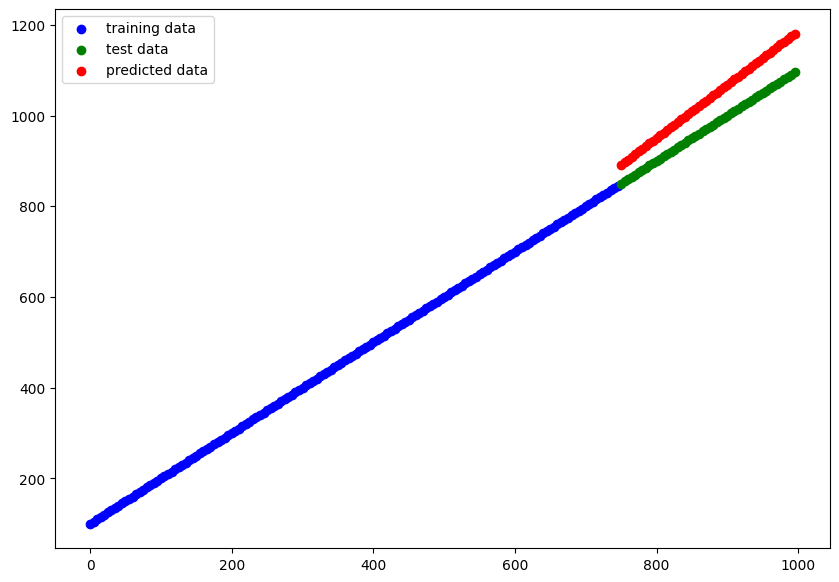

In [46]:
#Make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions against our regression data

plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "test data" )
plt.scatter(X_reg_test, y_reg_preds, c= "r", label = "predicted data")
plt.legend()

## the missing piece: non-linearity

In [60]:
#set the random seed
tf.random.set_seed(42)

#1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

#2. compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])


#3. fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3936 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3427 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3361 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3225 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3080 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2496 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2085 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1887 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1823 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1770 - accuracy: 0.4730
Epoch 11/

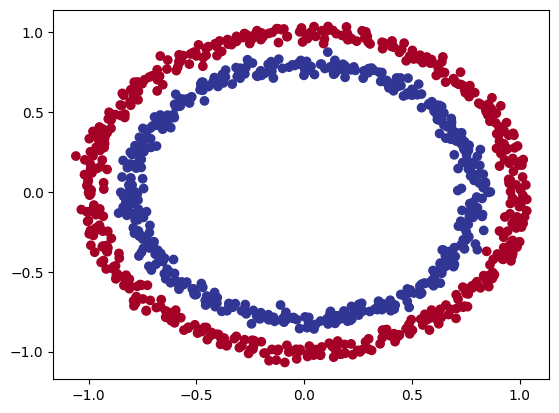

In [49]:
#check out our data
plt.scatter(X[:,0], X[:,1], c=y , cmap = plt.cm.RdYlBu)

79/79 [==============================] - 0s 2ms/step
doing binary classification


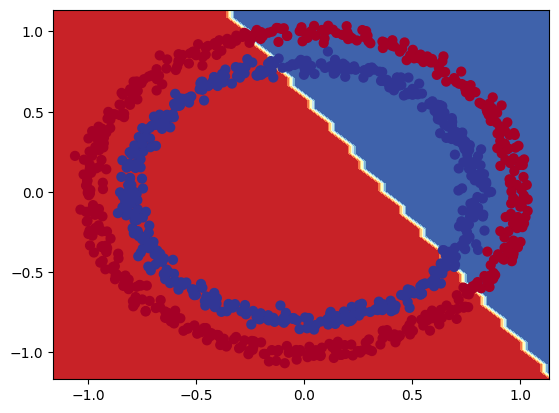

In [61]:
#check the decision boundary for our latest model
plot_decision_boundary(model_4, X=X, y=y)

let's try build our first neural network with non-linear activation function.

In [67]:
#Set random seed
tf.random.set_seed(42)

#1. create the model with non-linear activation function

model_5 = tf.keras.Sequential ([
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu)
])

#2. compile the model
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.legacy.Adam(lr = 0.001),
                 metrics = ["accuracy"])

#3. fit the model
history = model_5.fit(X,y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.7847 - accuracy: 0.3090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6767 - accuracy: 0.3040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5755 - accuracy: 0.3050
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5084 - accuracy: 0.2920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4613 - accuracy: 0.2840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4061 - accuracy: 0.2830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3231 - accuracy: 0.2730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2341 - accuracy: 0.2670
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0306 - accuracy: 0.2440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8122 - accuracy: 0.2050
Epoch 11/100
32/32 [=

In [89]:
#time to replication the multi-layer neural network from tf playground to our code

#Set the random seed
tf.random.set_seed(42)

#1. create the model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.legacy.Adam(lr = 0.001),
                metrics = ["accuracy"])

#3. fit the model
history = model_6.fit(X,y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 1.6958 - accuracy: 0.4210
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1807 - accuracy: 0.4340
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0458 - accuracy: 0.4460
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9252 - accuracy: 0.4600
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8586 - accuracy: 0.4640
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.4670
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.4700
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.4660
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.4510
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.4170
Epoch 11/

In [90]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.6780


[0.555578351020813, 0.6779999732971191]

313/313 [==============================] - 1s 2ms/step
doing binary classification


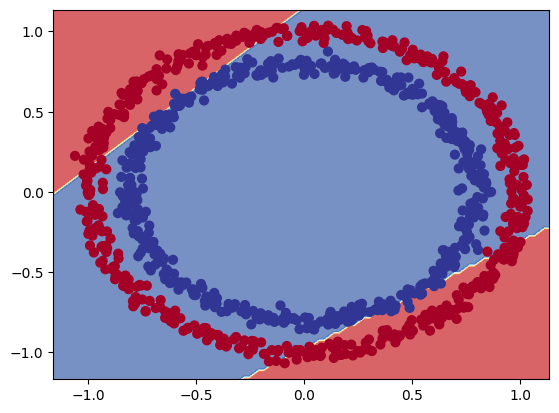

In [92]:

#how do our model prediction look?
plot_decision_boundary(model_6,X,y)

In [140]:
#set the random seed
tf.random.set_seed(42)


#1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])


#3. fit the model
history = model_7.fit(X_train,y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5088
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5025
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4988
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5038
Epoch 11/

In [142]:
#4. evaluate the model

model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8750


[0.4873196482658386, 0.875]

313/313 [==============================] - 1s 2ms/step
doing binary classification


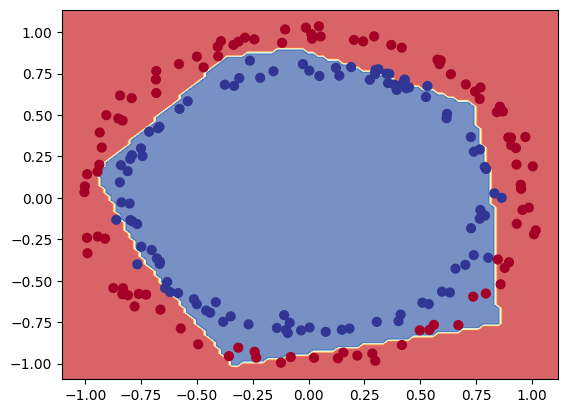

In [141]:
#visualize the metrics

plot_decision_boundary(model_7, X_test,y_test)

**Question:** What's wrong with the prediction we have made? Are we really evaluating our model correctly? Hint: what data did the model learn on, what data did we predict on?


**note**: The combination of **linear (straight lines) and non-linear (non-straight lines) functions** in one of the key fundamentals of neural networks.

Now we will discuss the concept of linear and non-linear functions (or lines), let's see them in action.

In [149]:
#Create a toy tensor(similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

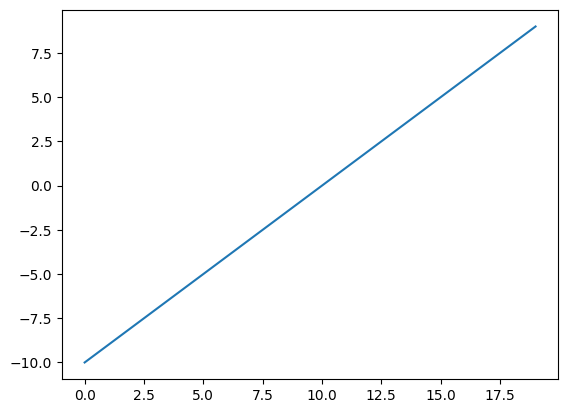

In [150]:
#visualize our toy tensor
plt.plot(A)

In [153]:
#Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))

def sigmoid(x):
  return 1/(1+tf.exp(-x))

#use the sigmoid function on our toy tensor
sigmoid(A)
  

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

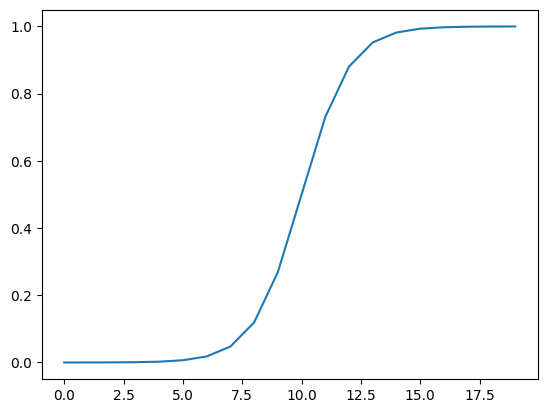

In [154]:
#plot out toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [155]:
#let's recreate relu function
def relu(x):
  return tf.maximum(0, x)


#pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

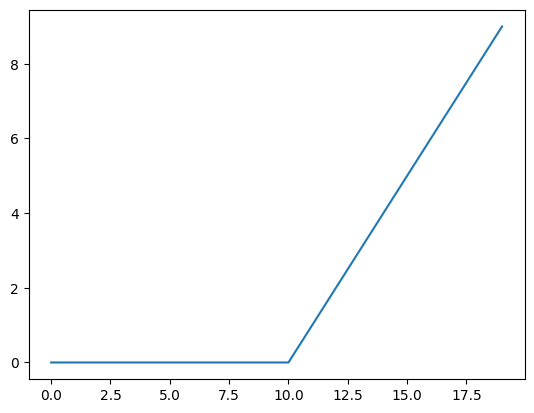

In [156]:
#Plot ReLU-modified tensor
plt.plot(relu(A))

In [157]:
#Lets try linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

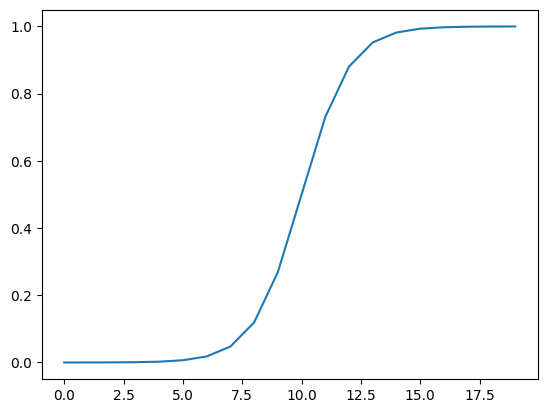

In [158]:
#does the linear activation function change anything? => nope
plt.plot(tf.keras.activations.linear(sigmoid(A)))

##Evaluating and improving our classification model

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [159]:
#Check how many examples we have 
len(X)

1000

In [160]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]


X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [163]:
#Let's recreate the model to fit on the training data and evaluate on the testing data

#set random seed
tf.random.set_seed(42)

#1. create the model( same as model_7)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#2. Compile the model

model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.legacy.Adam(lr = 0.01),
                metrics=["accuracy"])


#3. fit the model
history = model_8.fit(X_train, y_train, epochs = 25)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.7014 - accuracy: 0.4625
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4225
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4837
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5038
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5100
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5125
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5362
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5512
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5562
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6150
Epoch 11/25
25/25 [

In [164]:
#4. evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9950


[0.05699717625975609, 0.9950000047683716]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


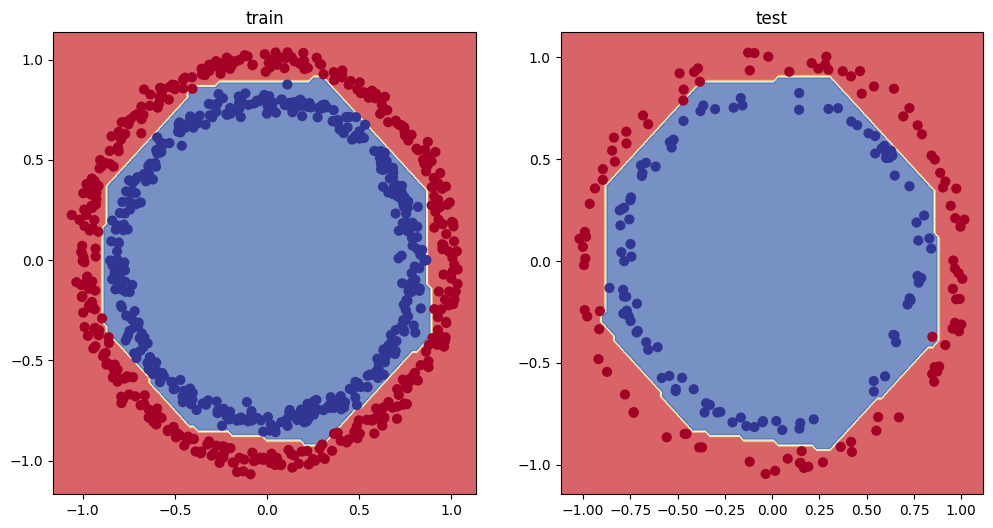

In [165]:
#plot the decision boundaries for the training and the test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8, X_test, y_test)

##Plot the loss (or training) curves

In [168]:
#convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.701448,0.46250
1,0.695876,0.42250
2,0.693863,0.48375
3,0.693097,0.50375
4,0.692148,0.51000
5,0.691304,0.51250
6,0.688877,0.53625
7,0.686494,0.55125
8,0.680393,0.55625
9,0.666117,0.61500


Text(0.5, 1.0, 'Model_8_loss_curves')

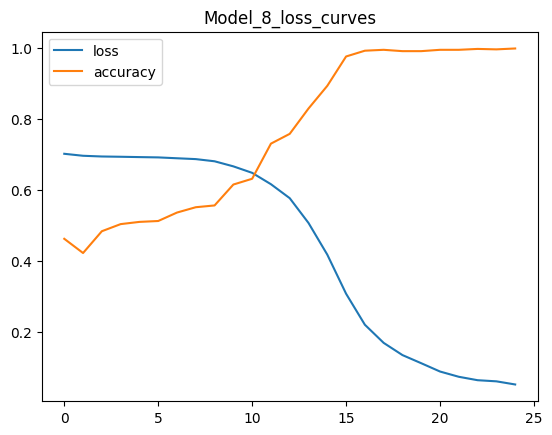

In [169]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8_loss_curves")

**Note:** for many problems, the loss function is going down => the model is improving(the prediction it's making are getting closer to the ground truth labels).


##finding the best learning rate
to find the ideal learning rate (the learning rate where the loss decreased the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think callback as an extra piece of functionality, you can add to your *while* it's training

* Another model (we could use the same one as above, but we're practising building model here)

* A modified loss curves plot

In [170]:
#Set random seed
tf.random.set_seed(42)

#create a model(same as model_8)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    
])

#compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

#fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7055 - accuracy: 0.5200 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.5250 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.5238 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5225 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7040 - accuracy: 0.5200 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.5175 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5225 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

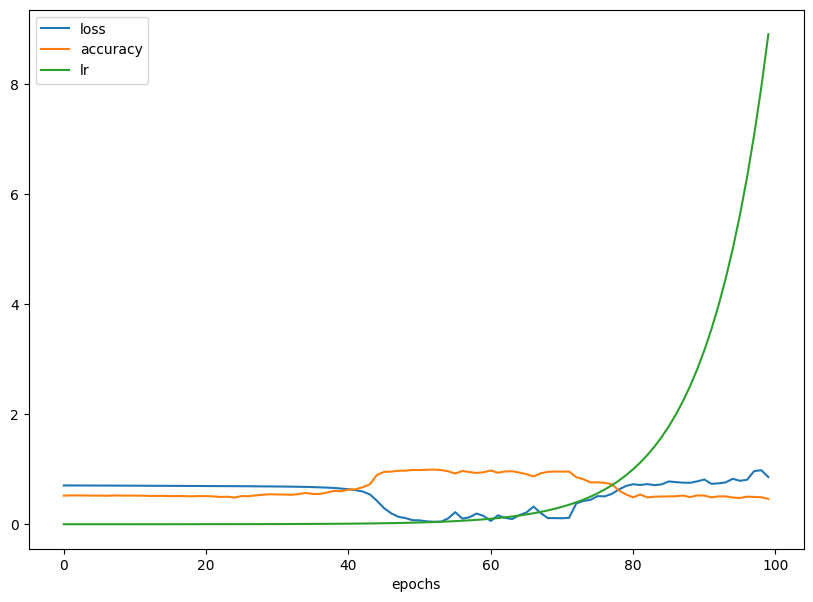

In [172]:
#checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

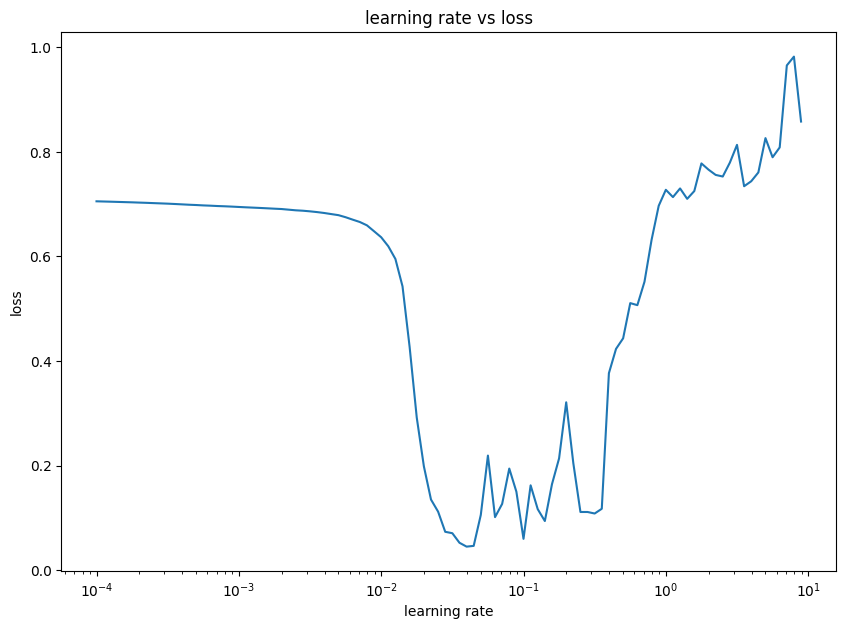

In [176]:
#Plot the learning rate vs the loss
lrs = 1e-4*(10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [177]:
#Exmaple of other typical learning rates values:
10**0, 10**-1,10**-2, 10**-3, 1e-4


(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
0.003,0.0025

In [180]:
#Lets try using a higher ideal learning rate with the same model

#Set random seed 
tf.random.set_seed(42)

#create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#compile the model (with lr = 0.02 => the ideal learning rate)

model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.legacy.Adam(lr = 0.02),
                 metrics = ["accuracy"])

#fit the model for 20 epochs (5 less the before)
history_10 = model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6972 - accuracy: 0.4950
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5238
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5663
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6200
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.7075
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7625
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7887
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8188
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.9550
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.9850
Epoch 11/20
25/25 [

In [181]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9950


[0.04701167717576027, 0.9950000047683716]

In [182]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9950


[0.05699717625975609, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


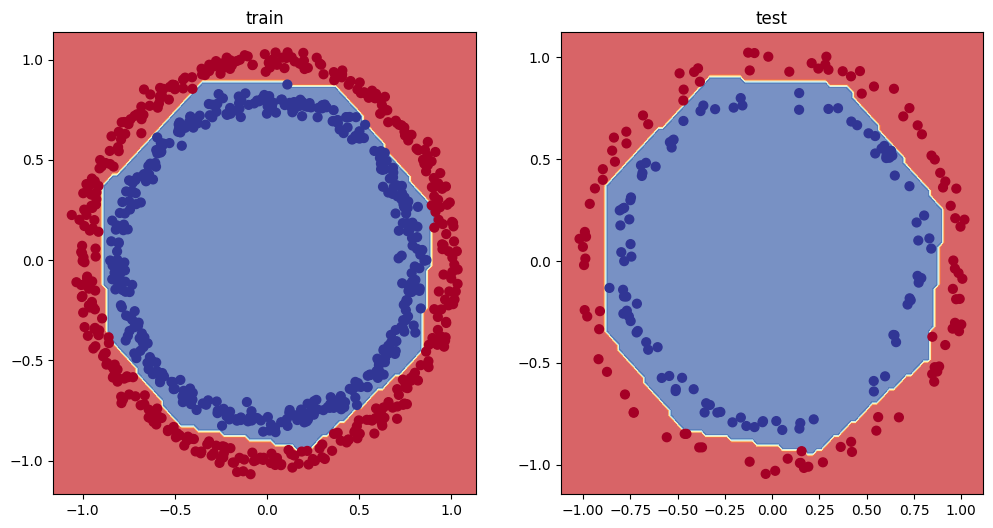

In [184]:
#Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10, X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods
Along side visualizing our model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Percision
* Recall
* F1-score (combination of percision and recall => these 2 are trading off)
* Confusion matrix
* Classification report (from sciki-learn)

In [185]:
#Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9950
model loss on the test set: 0.04701167717576027
model accuracy on the test set:99.50%


How about a confusion matrix?

In [193]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(X_test)
y_test.dtype,y_preds.dtype
#Create our confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


array([[100,   1],
       [  0,  99]])

Oops... looks like our predictions array has come out in **prediction probability** form ... the standard output from the sigmoid (or softmax) activation functions

In [192]:
# Convert our prediction probabilities to binary format and view the first 10
tf.squeeze(tf.cast(tf.round(y_preds), dtype = tf.int64))

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])>

In [194]:
#Create our confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

how about we prettify our confusion matrix?


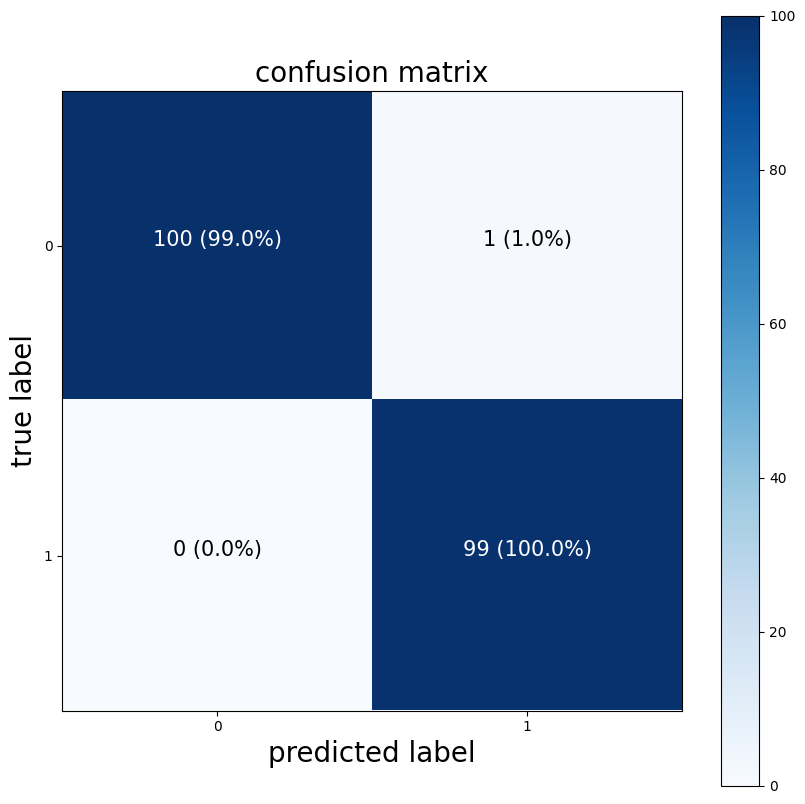

In [200]:
#note: the confusion matrix code we're going to write is just a remix of the scikit learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix


import itertools

figsize = (10,10)
#Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#let's prettify it
fig, ax = plt.subplots(figsize = figsize)
#Create the sub matix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

#create classes 
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


#label the axes
ax.set(title="confusion matrix",
       xlabel = "predicted label",
       ylabel = "true label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)



#set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set the threshold for different colors
threshold = (cm.max()+ cm.min())/2.
 
# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j]> threshold else "black",
           size = 15)
  
